In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
colors = ['dodgerblue','salmon','mediumseagreen']

# N=16

In [34]:
E_PT_PIMC = [1.5960045888379566, 1.54947507115796, 1.5114973441872617, 1.4779953000826163, 1.4500695847280929, 1.4141344843249832, 1.3851820634166971, 1.354903714322663, 1.3269512793079887, 1.3055072738504876, 1.2764970901884967, 1.258901540029548, 1.248503554720116, 1.2413523182386694, 1.2361180678662742, 1.2335023882145186, 1.2311458266381654, 1.2298840389926078,1.227433198238352]
E_PT_PIMC_err = [0.00035580316211303266, 0.0003329898567278955, 0.00034188122723691964, 0.00032638556053248474, 0.00033837595030027605, 0.00035201734672860865, 0.0003546192500934129, 0.00035334913695127897, 0.0003754566096056561, 0.00040550281492374873, 0.00042217093905799226, 0.0004532156744642555, 0.0005180271713738149, 0.0004897411776389725, 0.0005199884498706253, 0.0005499219417546537, 0.000606898890670794, 0.0006177650762991326,0.0006837228396847693]
# betas = [0.6,0.7,0.8,0.9,1.0,1.15,1.30,1.50,1.75,2.0,2.25,2.50,2.75,3.0,3.25,3.50,3.75,4.0,5.0]
betas = [0.6, 0.7, 0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0,7.0]

E_PT_exact = 1.226694406837E+00

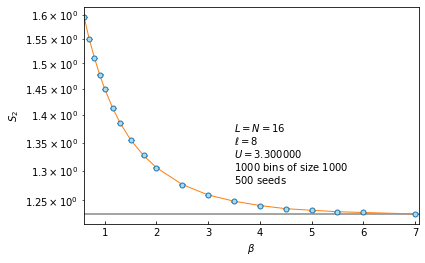

In [35]:
fig,ax1 = plt.subplots()
ax1.errorbar(betas,E_PT_PIMC, yerr=E_PT_PIMC_err, fmt='.', capsize=3,ms=10,mfc='lightblue');
ax1.plot(betas,E_PT_PIMC,lw=1)
ax1.set_ylabel(r'$S_2$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 16$",(0.55,0.50),xycoords='figure fraction')
ax1.annotate(r"$\ell=8$",(0.55,0.45),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.55,0.40),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.55,0.30),xycoords='figure fraction')
ax1.axhline(E_PT_exact,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction="in")
ax1.set_yscale("log")
plt.savefig("betaScalingS2FullU3.3_N16_loglinear.pdf",dpi=400)
plt.savefig("betaScalingS2FullU3.3_N16_loglinear.png",dpi=400)
plt.plot();

# Relative Errors vs $\beta$

In [36]:
# Load PIMC estimates for various betas
E_PT_PIMC = np.array(E_PT_PIMC)
E_PT_PIMC_err = np.array(E_PT_PIMC_err)

In [37]:
# Compute relative errors
E_PT_relErr = (np.abs(E_PT_PIMC - E_PT_exact)/E_PT_exact)

In [38]:
# Compute the error propagation
E_PT_PIMC_err_err = E_PT_PIMC_err / E_PT_exact

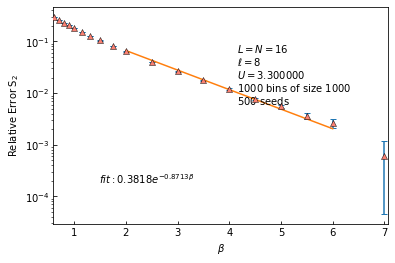

In [39]:
fig,ax1 = plt.subplots()

ax1.errorbar(betas[:],E_PT_relErr[:], yerr=E_PT_PIMC_err_err[:], fmt='.', capsize=3,ms=0)
ax1.scatter(betas[:],E_PT_relErr[:],marker='^',lw=0.47,label=r'$U=3.3$',color=colors[1],ec='black',zorder=10)

ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; S_2$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 16$",(0.60,0.50+.30),xycoords='figure fraction')
ax1.annotate(r"$\ell=8$",(0.60,0.45+.30),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.60,0.35+.30),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.60,0.30+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.set_yscale("log")
ax1.tick_params(direction='in')

# Perform linear fit to ln(y) vs x:
m,lnB = np.polyfit(betas[9:],np.log(E_PT_relErr)[9:],deg=1)
B = np.exp(lnB)

betas_fit = np.linspace(betas[9],6.0,1000)
ax1.plot(betas_fit,B*np.exp(m*betas_fit))
ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

plt.savefig("relativeErrorsS2Full_N16_loglinear.pdf",dpi=400)
plt.savefig("relativeErrorsS2Full_N16_loglinear.png",dpi=400)
plt.show()

### Perform exponential fit

In [9]:
betas[9]

2.0

# N=8

In [10]:
E_PT_PIMC = [1.283063824373033, 1.2442887781562635, 1.2138808385917554, 1.188331089001819, 1.1675423110485645, 1.1426829422123184, 1.122834710352782, 1.1029376073119375, 1.0862701620578818, 1.0743652259420873, 1.066163429272231, 1.0611921547054055, 1.056726429098831, 1.0542177720294237, 1.0530258381696254, 1.0514991151278186, 1.0514255139059139, 1.0500700046285731, 1.0485846912994308, 1.048485421588436]
E_PT_PIMC_err = [0.00037186446456498903, 0.00035682667641612415, 0.0003527613324963051, 0.0003373633868146668, 0.0003418858296310912, 0.00035005478502329613, 0.00039042879121647554, 0.0003894643381520557, 0.00040292099936011406, 0.00042486893159278226, 0.00045748528751321575, 0.0004841741933135108, 0.00048413638804857594, 0.0005310858209815602, 0.0005420315804988035, 0.0005594554776271568, 0.0006213377620040871, 0.0005702653995445991, 0.0006427136672096225, 0.0007296669873474423]
betas = [0.6, 0.7, 0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 5.0, 6.0]

E_PT_exact = 1.0487557642692404

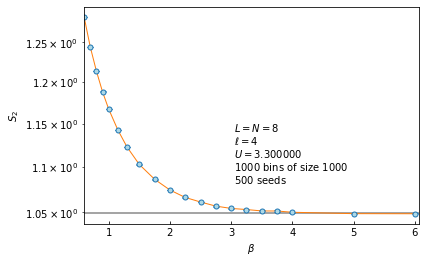

In [11]:
fig,ax1 = plt.subplots()
ax1.errorbar(betas,E_PT_PIMC, yerr=E_PT_PIMC_err, fmt='.', capsize=3,ms=10,mfc='lightblue');
ax1.plot(betas,E_PT_PIMC,lw=1)
ax1.set_ylabel(r'$S_2$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 8$",(0.55,0.50),xycoords='figure fraction')
ax1.annotate(r"$\ell=4$",(0.55,0.45),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.55,0.40),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.55,0.30),xycoords='figure fraction')
ax1.axhline(E_PT_exact,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction="in")
ax1.set_yscale("log")
plt.savefig("betaScalingS2FullU3.3_N8_loglinear.pdf",dpi=400)
plt.savefig("betaScalingS2FullU3.3_N8_loglinear.png",dpi=400)
plt.plot();

# Relative Errors vs $\beta$

In [12]:
# Load PIMC estimates for various betas
E_PT_PIMC = np.array(E_PT_PIMC)
E_PT_PIMC_err = np.array(E_PT_PIMC_err)

In [13]:
# Compute relative errors
E_PT_relErr = (np.abs(E_PT_PIMC - E_PT_exact)/E_PT_exact)

In [14]:
# Compute the error propagation
E_PT_PIMC_err_err = E_PT_PIMC_err / E_PT_exact

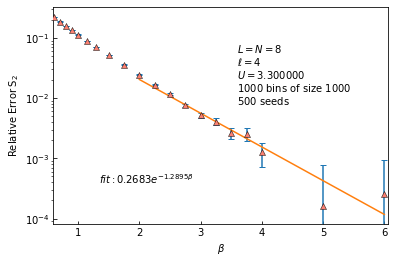

In [15]:
fig,ax1 = plt.subplots()

ax1.errorbar(betas[:],E_PT_relErr[:], yerr=E_PT_PIMC_err_err[:], fmt='.', capsize=3,ms=0)
ax1.scatter(betas[:],E_PT_relErr[:],marker='^',lw=0.47,label=r'$U=3.3$',color=colors[1],ec='black',zorder=10)

ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; S_2$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 8$",(0.60,0.50+.30),xycoords='figure fraction')
ax1.annotate(r"$\ell=4$",(0.60,0.45+.30),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.60,0.35+.30),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.60,0.30+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.set_yscale("log")
ax1.tick_params(direction='in')

# Perform linear fit to ln(y) vs x:
m,lnB = np.polyfit(betas[9:],np.log(E_PT_relErr)[9:],deg=1)
B = np.exp(lnB)

betas_fit = np.linspace(betas[9],6.0,1000)
ax1.plot(betas_fit,B*np.exp(m*betas_fit))
ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

plt.savefig("relativeErrorsS2Full_N8_loglinear.pdf",dpi=400)
plt.savefig("relativeErrorsS2Full_N8_loglinear.png",dpi=400)
plt.show()

In [16]:
betas[9]

2.0

# N=4

In [159]:
E_PT_PIMC = np.array([-7.411475295000061, -7.325326452856991, -7.259272776249998, -7.20700945222185, -7.16657682, -7.122619200000483, -7.093031253846255, -7.0679361540000265, -7.050690811428519, -7.041153705500001, -7.03432806, -7.032495560666664, -7.032087160285663, -7.03211959675, -7.032230079111209, -7.0322874482, -7.032854164181895, -7.032001529726119])
E_PT_PIMC += np.array([3.000541502639674, 2.8810624781396865, 2.7978209859596954, 2.7337836668997033, 2.6880437588397097, 2.639648215379716, 2.6087317238397207, 2.5826763025797246, 2.565625277819727, 2.5570781590197282, 2.550659185799729, 2.54916347003973, 2.54929775825973, 2.54895968381973, 2.54892771407973, 2.5490309730597303, 2.5488780629397296, 2.5490011905808925])
    
K_err = np.array([0.00038912529812362083, 0.00039736529895944244, 0.0003393234210466618, 0.0003261609579942047, 0.0003013928156628828, 0.00032609495207036913, 0.000301412914898525, 0.00026546669388771536, 0.00028622765977969074, 0.00027567629766864096, 0.0002524004196272263, 0.00025178803818286043, 0.00024781052460522173, 0.000249777121720227, 0.0002513607118099627, 0.00024024818090590016, 0.0002433119562053279, 0.00024028951639476509])
V_err = np.array([0.0001228215301120476, 0.00012872489313936236, 0.00010853120290831155, 0.00011615737649389721, 0.00010942669426509465, 0.00011345290383586935, 0.0001162242112851249, 0.0001145433464773373, 0.000123740303877887, 0.0001294766433285463, 0.0001505736010166996, 0.00015067005531232676, 0.00016103469306400606, 0.00017810661877829914, 0.00017317756860729102, 0.00018724714525304134, 0.0002071219712488186, 0.00018958352407281014])

# Error propagation
E_PT_PIMC_err = np.sqrt(K_err**2+V_err**2)
betas = [0.6, 0.7, 0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]
E_PT_exact = -4.483176600115984

In [160]:
E_PT_PIMC

array([-4.41093379, -4.44426397, -4.46145179, -4.47322579, -4.47853306,
       -4.48297098, -4.48429953, -4.48525985, -4.48506553, -4.48407555,
       -4.48366887, -4.48333209, -4.4827894 , -4.48315991, -4.48330237,
       -4.48325648, -4.4839761 , -4.48300034])

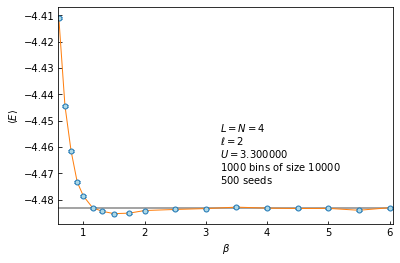

In [166]:
fig,ax1 = plt.subplots()
ax1.errorbar(betas,E_PT_PIMC, yerr=E_PT_PIMC_err, fmt='.', capsize=3,ms=10,mfc='lightblue');
ax1.plot(betas,E_PT_PIMC,lw=1)
ax1.set_ylabel(r'$\langle E \rangle$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 4$",(0.55,0.50),xycoords='figure fraction')
ax1.annotate(r"$\ell=2$",(0.55,0.45),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.55,0.40),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $10000$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.55,0.30),xycoords='figure fraction')
ax1.axhline(E_PT_exact,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction="in")
# ax1.set_yscale("log")

# TRY DOING NON-LINEAR FIT TO <E>
# use scipy.optimize.curve_fit()

plt.savefig("betaScalingEU3.3_N4.pdf",dpi=400)
plt.savefig("betaScalingEU3.3_N4.png",dpi=400)
plt.plot();

# Relative Errors vs $\beta$

In [162]:
# Load PIMC estimates for various betas
E_PT_PIMC = np.array(E_PT_PIMC)
E_PT_PIMC_err = np.array(E_PT_PIMC_err)

In [163]:
# Compute relative errors
E_PT_relErr = np.abs((E_PT_PIMC - E_PT_exact)/E_PT_exact)

In [152]:
E_PT_relErr

array([1.61142008e-02, 8.67969943e-03, 4.84585190e-03, 2.21959019e-03,
       1.03576981e-03, 4.58637956e-05, 2.50476390e-04, 4.64681963e-04,
       4.21338185e-04, 2.00515493e-04, 1.09804750e-04, 3.46831108e-05,
       8.63669056e-05, 3.72217898e-06, 2.80526347e-05, 1.78166134e-05,
       1.78333623e-04, 3.93160891e-05])

In [164]:
# Compute the error propagation
E_PT_PIMC_err_err = E_PT_PIMC_err / E_PT_exact

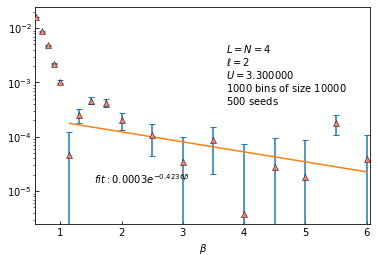

In [165]:
fig,ax1 = plt.subplots()

ax1.errorbar(betas[:],E_PT_relErr[:], yerr=E_PT_PIMC_err_err[:], fmt='.', capsize=3,ms=0)
ax1.scatter(betas[:],E_PT_relErr[:],marker='^',lw=0.47,label=r'$U=3.3$',color=colors[1],ec='black',zorder=10)


# ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; \langle E \rangle$')
# ax1.set_ylabel(r'$\log \rm{Relative} \; \rm{Error} \; \langle E \rangle / \Delta$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 4$",(0.60,0.50+.30),xycoords='figure fraction')
ax1.annotate(r"$\ell=2$",(0.60,0.45+.30),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $10000$",(0.60,0.35+.30),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.60,0.30+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.set_yscale("log")
ax1.tick_params(direction='in')

# Perform linear fit to ln(y) vs x:
m,lnB = np.polyfit(betas[5:],np.log(E_PT_relErr)[5:],deg=1)
B = np.exp(lnB)

betas_fit = np.linspace(betas[5],betas[-1],1000)
ax1.plot(betas_fit,B*np.exp(m*betas_fit))
ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

# b = np.polyfit(betas[0:5],-np.log(E_PT_relErr)[0:5]/Δ,deg=0) # "b" in my notes
# B = np.exp(-b*Δ)

# betas_fit = np.linspace(betas[0],betas[4],1000)
# ax1.plot(betas_fit,B*np.exp(-betas_fit*Δ))
# ax1.annotate(r"$fit: %.4f e^{\beta \Delta}$"%(B),(0.25,0.30+.0),xycoords='figure fraction')

# On same plot, include linear fit to small beta regime

plt.savefig("relativeErrorsE_N4_loglinear.pdf",dpi=400)
plt.savefig("relativeErrorsE_N4_loglinear.png",dpi=400)
plt.show()

In [144]:
B

array([0.00435035])

[]

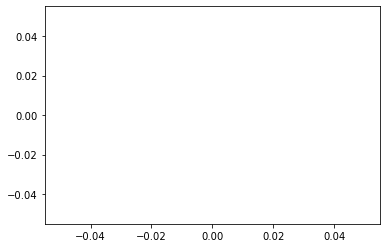

In [145]:
plt.plot()

In [146]:
β̄_fit

array([2.20531677, 2.20678845, 2.20826014, 2.20973182, 2.2112035 ,
       2.21267518, 2.21414687, 2.21561855, 2.21709023, 2.21856192,
       2.2200336 , 2.22150528, 2.22297696, 2.22444865, 2.22592033,
       2.22739201, 2.2288637 , 2.23033538, 2.23180706, 2.23327874,
       2.23475043, 2.23622211, 2.23769379, 2.23916548, 2.24063716,
       2.24210884, 2.24358052, 2.24505221, 2.24652389, 2.24799557,
       2.24946726, 2.25093894, 2.25241062, 2.2538823 , 2.25535399,
       2.25682567, 2.25829735, 2.25976904, 2.26124072, 2.2627124 ,
       2.26418408, 2.26565577, 2.26712745, 2.26859913, 2.27007082,
       2.2715425 , 2.27301418, 2.27448586, 2.27595755, 2.27742923,
       2.27890091, 2.2803726 , 2.28184428, 2.28331596, 2.28478764,
       2.28625933, 2.28773101, 2.28920269, 2.29067438, 2.29214606,
       2.29361774, 2.29508942, 2.29656111, 2.29803279, 2.29950447,
       2.30097616, 2.30244784, 2.30391952, 2.3053912 , 2.30686289,
       2.30833457, 2.30980625, 2.31127794, 2.31274962, 2.31422